In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
#create the session
conf = SparkConf().set("spark.ui.port", "4050")
#create the context
import pyspark
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!sleep 10
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 16.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=fd2529f24c0abc19cc955bb769574487f082345cc1ed7864af60b524b2690ded
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The followin

In [ ]:
from pyspark import SparkContext                                    # Importing SparkContext
from pyspark.sql import SparkSession, Window, Row                   # Importing importing methods for creating a cluster
from pyspark.sql import functions as F                              # Importing SQL Functions
from pyspark.sql.functions import col, isnan, when, count           # Importing relevant dataframe functions
from pyspark.sql.functions import *                                 # Importing inbuilt SQL Functions
from pyspark.sql.types import *                                     # Importing SQL types
from pyspark.ml.feature import VectorAssembler                      # For processing dataset for ML
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once


In [ ]:
from google.colab import files
files.upload()


Saving car data.csv to car data.csv


{'car data.csv': b'Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner\r\nritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0\r\nsx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0\r\nciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0\r\nwagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0\r\nswift,2014,4.6,6.87,42450,Diesel,Dealer,Manual,0\r\nvitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0\r\nciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0\r\ns cross,2015,6.5,8.61,33429,Diesel,Dealer,Manual,0\r\nciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0\r\nciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0\r\nalto 800,2017,2.85,3.6,2135,Petrol,Dealer,Manual,0\r\nciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0\r\nciaz,2015,7.5,9.94,15000,Petrol,Dealer,Automatic,0\r\nertiga,2015,6.1,7.71,26000,Petrol,Dealer,Manual,0\r\ndzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0\r\nertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0\r\nertiga,2015,7.25,10.79,41678,Die

In [ ]:
df = spark.read.csv("car data.csv", header = True, inferSchema="true")
df.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

In [ ]:
print("shape of dataset : ","rows : ",df.count(),"and columns:",len(df.columns))

shape of dataset :  rows :  301 and columns: 9


In [ ]:
df.show(10)

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

In [ ]:
df.head(5)

[Row(Car_Name='ritz', Year=2014, Selling_Price=3.35, Present_Price=5.59, Kms_Driven=27000, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='sx4', Year=2013, Selling_Price=4.75, Present_Price=9.54, Kms_Driven=43000, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='ciaz', Year=2017, Selling_Price=7.25, Present_Price=9.85, Kms_Driven=6900, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='wagon r', Year=2011, Selling_Price=2.85, Present_Price=4.15, Kms_Driven=5200, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='swift', Year=2014, Selling_Price=4.6, Present_Price=6.87, Kms_Driven=42450, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0)]

In [ ]:
## describe funtion like pandas
df.describe().show()

+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|summary|Car_Name|              Year|    Selling_Price|    Present_Price|       Kms_Driven|Fuel_Type|Seller_Type|Transmission|              Owner|
+-------+--------+------------------+-----------------+-----------------+-----------------+---------+-----------+------------+-------------------+
|  count|     301|               301|              301|              301|              301|      301|        301|         301|                301|
|   mean|   800.0|2013.6279069767443|4.661295681063127|7.628471760797344|36947.20598006644|     null|       null|        null|0.04318936877076412|
| stddev|    null|2.8915541273367253|5.082811556177805|8.644115402015789|38886.88388206789|     null|       null|        null| 0.2479148926949198|
|    min|     800|              2003|              0.1|             0.32|              500|      CNG|     Dealer|   Au

### checking dataframe schema, similar to pandas df.info()

In [ ]:
df.printSchema()

root
 |-- Car_Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Selling_Price: double (nullable = true)
 |-- Present_Price: double (nullable = true)
 |-- Kms_Driven: integer (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Seller_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Owner: integer (nullable = true)



### Exploring basic dataframe functions

In [ ]:
df.select("Selling_Price").show()

+-------------+
|Selling_Price|
+-------------+
|         3.35|
|         4.75|
|         7.25|
|         2.85|
|          4.6|
|         9.25|
|         6.75|
|          6.5|
|         8.75|
|         7.45|
|         2.85|
|         6.85|
|          7.5|
|          6.1|
|         2.25|
|         7.75|
|         7.25|
|         7.75|
|         3.25|
|         2.65|
+-------------+
only showing top 20 rows



In [ ]:
df.select(["Selling_Price","Present_Price"]).show()

+-------------+-------------+
|Selling_Price|Present_Price|
+-------------+-------------+
|         3.35|         5.59|
|         4.75|         9.54|
|         7.25|         9.85|
|         2.85|         4.15|
|          4.6|         6.87|
|         9.25|         9.83|
|         6.75|         8.12|
|          6.5|         8.61|
|         8.75|         8.89|
|         7.45|         8.92|
|         2.85|          3.6|
|         6.85|        10.38|
|          7.5|         9.94|
|          6.1|         7.71|
|         2.25|         7.21|
|         7.75|        10.79|
|         7.25|        10.79|
|         7.75|        10.79|
|         3.25|         5.09|
|         2.65|         7.98|
+-------------+-------------+
only showing top 20 rows



In [ ]:
df.dtypes

[('Car_Name', 'string'),
 ('Year', 'int'),
 ('Selling_Price', 'double'),
 ('Present_Price', 'double'),
 ('Kms_Driven', 'int'),
 ('Fuel_Type', 'string'),
 ('Seller_Type', 'string'),
 ('Transmission', 'string'),
 ('Owner', 'int')]

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
### checking type of column
print(type(df.select("Selling_Price")))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
### filtring out top 5 rows and dispaying them
df1 = df.limit(5)
df1.show()

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|    ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|     sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|    ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
| wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|   swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+



### Filtering out the top 5 rows and displaying them, as well as displaying the rest of the dataframe.

In [ ]:
row_list = df.collect()
type(row_list)

list

In [ ]:
## slicing the python list
part1 = row_list[:5]
part2 = row_list[5:]

In [ ]:
## converting slice to spark dataframe
slice1 = spark.createDataFrame(part1)
slice2 = spark.createDataFrame(part2)

In [ ]:
slice1.show(10)

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|    ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|     sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|    ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
| wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|   swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+



In [ ]:
slice2.show(15)

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manual|    0|
|      s cross|2015|          6.5|         8.61|     33429|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2016|         8.75|         8.89|     20273|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         7.45|         8.92|     42367|   Diesel|     Dealer|      Manual|    0|
|     alto 800|2017|         2.85|          3.6|      2135|   Petrol|     Dealer|      Manual|    0|
|         ciaz|2015|         6.85|        10.38|     51000|   Diesel|     Dealer|      Manu

### adding new column to the dataset

In [ ]:
df1 = df.withColumn("car new",df["Present_Price"]*2)
df1.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+-------+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|car new|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+-------+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|  11.18|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|  19.08|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|   19.7|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|    8.3|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|  13.74|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|  19.66|
|         ciaz|2015

In [ ]:
## droping the newly added column
df2 = df1.drop("car new")

In [ ]:
df2.show(10)

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2015|         6.75|         8.12|     18796|   Petrol|     Dealer|      Manu

In [ ]:
### converting to the pandas dataframe

In [ ]:
pandas_df=df1.toPandas()

In [ ]:
pandas_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car new
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11.18
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,19.08
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,19.70
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,13.74


In [ ]:
print(type(pandas_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
pandas_df.shape

(301, 10)

In [ ]:
pandas_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car new
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11.18
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,19.08
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,19.70
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,13.74


## Data Preprocessing

In [ ]:
## PySpark doesn't have the sophisticated function like Pandas to check for null values.

In [ ]:
#But we have used a custom code to check for null values in a dataframe.
# Creating a dataframe to check null value counts

In [ ]:
null_df = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '') | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])

In [ ]:
## displaying the null value counts dataframe

In [ ]:
null_df.show()

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|       0|   0|            0|            0|         0|        0|          0|           0|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+



In [ ]:
df.show(2)

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|    ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|     sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
only showing top 2 rows



In [ ]:
## converting year in to datetime
df1 = df.withColumn("Year",F.to_date(F.col("Year").cast("string"),"yyyy"))

In [ ]:
df1.show(2)

+--------+----------+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|      Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----------+-------------+-------------+----------+---------+-----------+------------+-----+
|    ritz|2014-01-01|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|     sx4|2013-01-01|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
+--------+----------+-------------+-------------+----------+---------+-----------+------------+-----+
only showing top 2 rows



In [ ]:
## Extracting Year
df = df1.withColumn("Year",F.year(F.to_timestamp("Year","yyyy")))

In [ ]:
df.show(5)

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|    ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|     sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|    ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
| wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|   swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
only showing top 5 rows



## Exploratory Data Analysis

In [ ]:
#xploratory Data Analysis:HANDYSPARK
#convert our pyspark dataframe to handyspark dataframe using the following code:

# Converting to handyspark dataframe

In [ ]:
pip install handyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from handyspark import *

In [ ]:
hdf = df.toHandy()

In [ ]:
hdf.show(5)

+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|    ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|     sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|    ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
| wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|   swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
+--------+----+-------------+-------------+----------+---------+-----------+------------+-----+
only showing top 5 rows



In [ ]:
## Univariate Analysis:HandySpark provides a hist() method that can be used to plot histograms and barplots.

## Question 1: What is the spread of the Selling_Price feature?

In [ ]:
import matplotlib.pyplot as plt



---------------------------------------------------------------------------
HANDY EXCEPTION SUMMARY

Location: "/usr/local/lib/python3.8/dist-packages/pyspark/sql/group.py"
Line	: 137
Function: agg
Error	: AttributeError: 'HandyGrouped' object has no attribute 'session'
---------------------------------------------------------------------------


HandyException: ignored

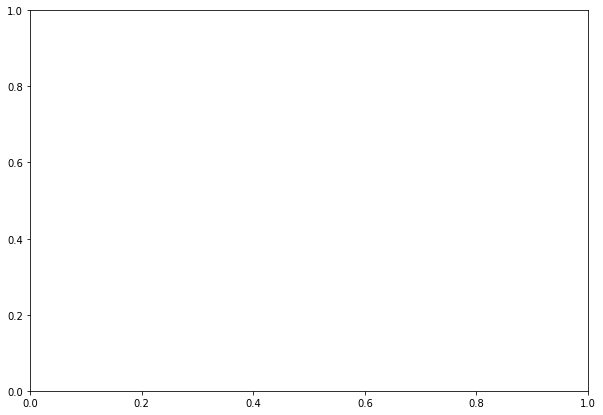

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
hdf.cols["Selling_Price"].hist(ax=ax)
plt.show()

## Question 2: What is the distribution of classes for Seller_Type feature?

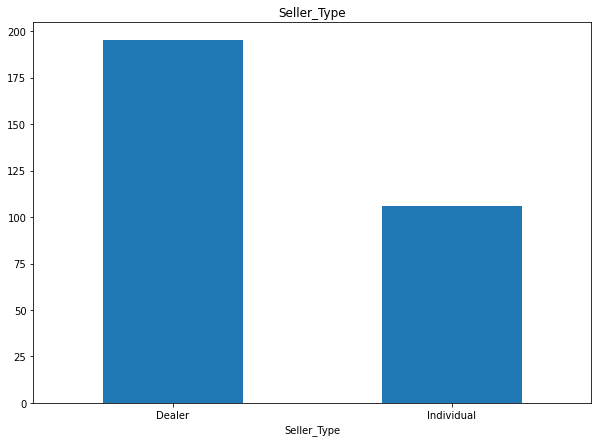

In [ ]:
fit, ax =plt.subplots(figsize=(10,7))
hdf.cols["Seller_Type"].hist(ax=ax)
plt.show()

## Question 3: What is the distribution of classes for Transmission feature?

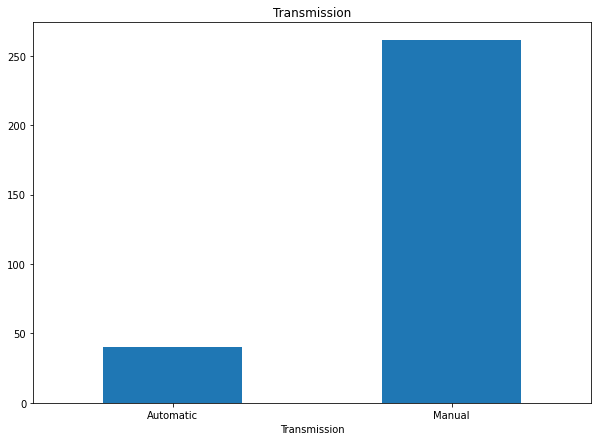

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Transmission'].hist(ax=ax)
plt.show()

## Question 4: What is the distribution of classes for Owner feature?

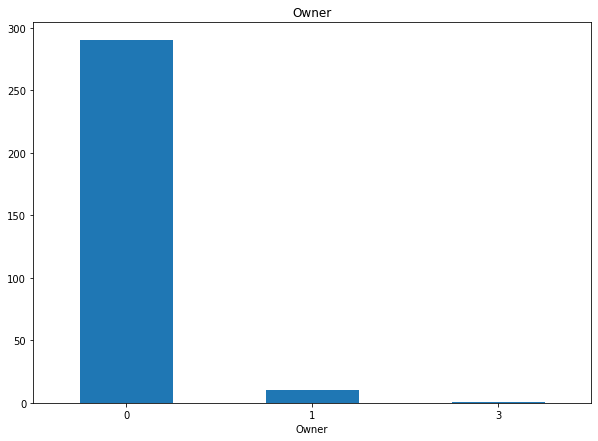

In [ ]:

fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['Owner'].hist(ax=ax)
plt.show()

## Multivariate Analysis:HandySpark's scatterplot() method can be used to plot scatterplots.

### Question 5: Determine the relation between Selling_Price and Kms_Driven features?


---------------------------------------------------------------------------
HANDY EXCEPTION SUMMARY

Location: "/usr/local/lib/python3.8/dist-packages/pyspark/sql/group.py"
Line	: 137
Function: agg
Error	: AttributeError: 'HandyGrouped' object has no attribute 'session'
---------------------------------------------------------------------------


HandyException: ignored

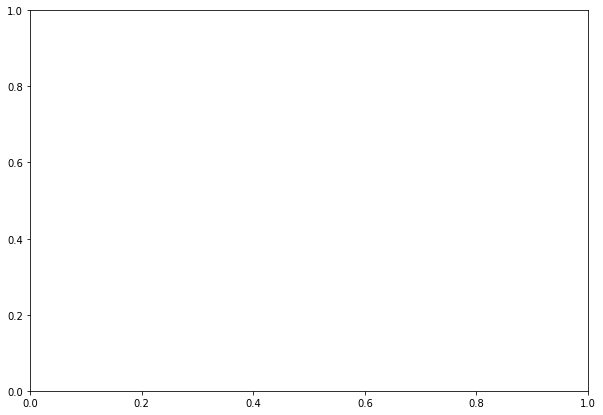

In [ ]:

fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols[['Kms_Driven', 'Selling_Price']].scatterplot(ax=ax)
plt.show()


### Question 6: Determine the relation between Selling_Price and Present_Price features?


---------------------------------------------------------------------------
HANDY EXCEPTION SUMMARY

Location: "/usr/local/lib/python3.8/dist-packages/pyspark/sql/group.py"
Line	: 137
Function: agg
Error	: AttributeError: 'HandyGrouped' object has no attribute 'session'
---------------------------------------------------------------------------


HandyException: ignored

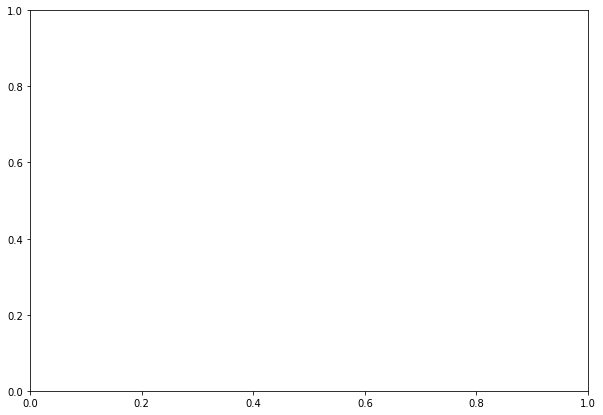

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols[['Selling_Price', 'Present_Price']].scatterplot(ax=ax)
plt.show()

### Question 7: Determine the relation between Selling_Price and Transmission Type features?


---------------------------------------------------------------------------
HANDY EXCEPTION SUMMARY

Location: "/usr/local/lib/python3.8/dist-packages/pyspark/sql/group.py"
Line	: 137
Function: agg
Error	: AttributeError: 'HandyGrouped' object has no attribute 'session'
---------------------------------------------------------------------------


HandyException: ignored

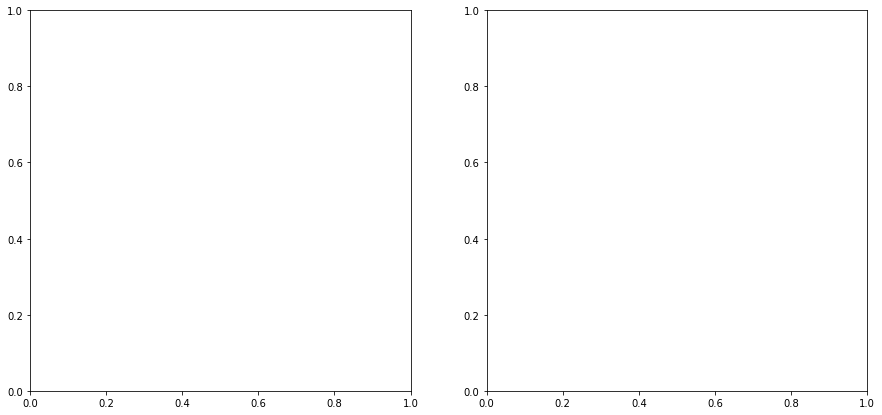

In [ ]:
##HandySpark offers a unique take on groupby like commands with the help of stratify method which works like split-apply-combine approach.

hdf.stratify(['Transmission']).cols['Selling_Price'].mean()
hdf.stratify(['Transmission']).cols['Selling_Price'].hist(figsize=(15,7))
plt.show()

### Question 8: Determine the relation between Selling_Price and Seller_Type features?


---------------------------------------------------------------------------
HANDY EXCEPTION SUMMARY

Location: "/usr/local/lib/python3.8/dist-packages/pyspark/sql/group.py"
Line	: 137
Function: agg
Error	: AttributeError: 'HandyGrouped' object has no attribute 'session'
---------------------------------------------------------------------------


HandyException: ignored

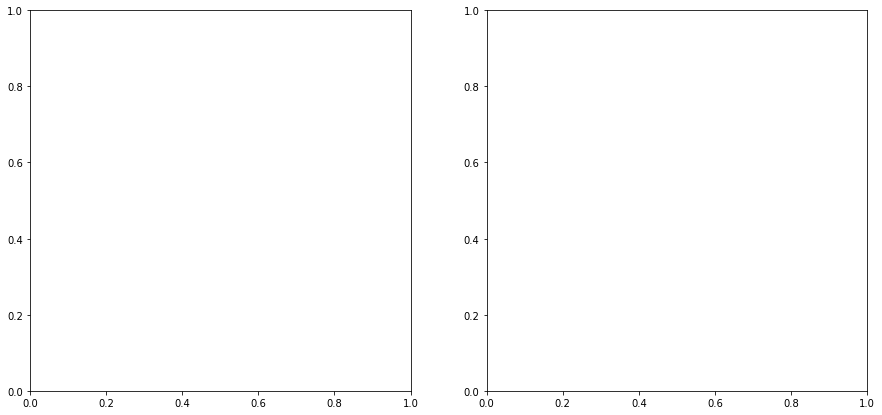

In [ ]:
hdf.stratify(['Seller_Type']).cols['Selling_Price'].hist(figsize=(15,7))
plt.show()

In [ ]:
### Question 9: Determine the relation between Selling_Price and Fuel_Type features?


---------------------------------------------------------------------------
HANDY EXCEPTION SUMMARY

Location: "/usr/local/lib/python3.8/dist-packages/pyspark/sql/group.py"
Line	: 137
Function: agg
Error	: AttributeError: 'HandyGrouped' object has no attribute 'session'
---------------------------------------------------------------------------


HandyException: ignored

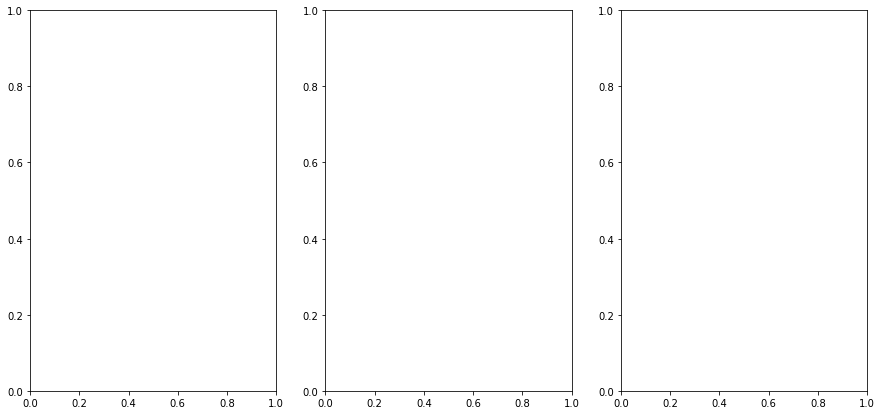

In [ ]:
hdf.stratify(['Fuel_Type']).cols['Selling_Price'].hist(figsize=(15,7))
plt.show()

### Question 10: Plot a heatmap to check for correlations between features?

In [ ]:
data = hdf.toPandas()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()



INFO: Safety is ON - returning up to 1000 instances.


NameError: ignored

<Figure size 1080x720 with 0 Axes>